<a href="https://colab.research.google.com/github/ANANDA-SWAROOP/aiml_project/blob/main/De_Novo_Protein_Function_Prediction_with_Bi_LSTM_and_Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow Version: 2.19.0
--- Starting Data Preprocessing ---
Fetching data for query: 'family:"actin family"'...
Successfully fetched 542 sequences.
Fetching data for query: 'family:"cytochrome p450 family"'...
Successfully fetched 1000 sequences.
Fetching data for query: 'family:"ferritin family"'...
Successfully fetched 109 sequences.
Filtered sequences: 1650 (removed 1 short sequences)

Data shape: X=(1650, 1024), y=(1650, 3)
Classes: [np.str_('Actin'), np.str_('Cytochrome P450'), np.str_('Ferritin')]

--- Building Model ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 1024)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 1024, 64)  │      1,408 │ input_layer_7[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_7         │ (None, 1024)      │          0 │ input_layer_7[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 1024, 64)  │     24,832 │ embedding_7[0][0… │
│ (Bidirectional)     │                   │            │ not_equal_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 64)        │      1,088 │ bidirectional[0]… │
│ (Attention)         │                   │            │ not_equal_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 3)         │        195 │ attention[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 27,523 (107.51 KB)

 Trainable params: 27,523 (107.51 KB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.6040 - loss: 0.9126 - val_accuracy: 0.8030 - val_loss: 0.7119
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6862 - loss: 0.7320 - val_accuracy: 0.8939 - val_loss: 0.4899
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.8773 - loss: 0.4140 - val_accuracy: 0.8864 - val_loss: 0.3379
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.8963 - loss: 0.3264 - val_accuracy: 0.8561 - val_loss: 0.3388
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.8812 - loss: 0.3004 - val_accuracy: 0.9167 - val_loss: 0.2185


--- DETAILED EVALUATION ON TEST SET ---


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step

--- 1. Confusion Matrix ---


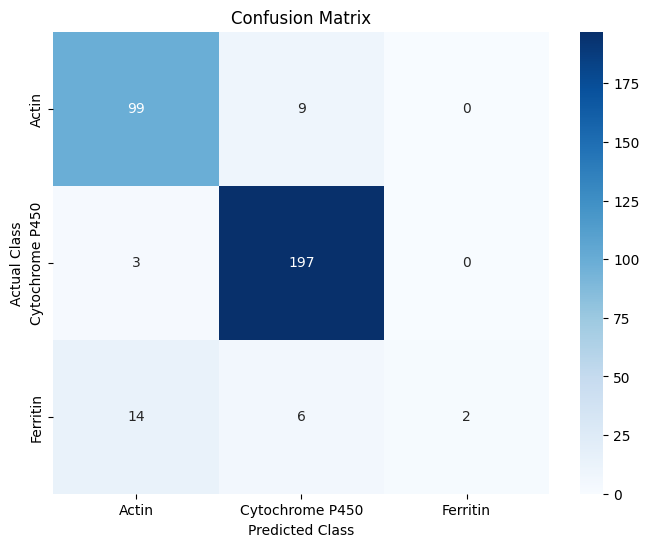


--- 2. Overall Accuracy ---
Total Test Accuracy: 90.30%

--- 3. Classification Report ---
                 precision    recall  f1-score   support

          Actin       0.85      0.92      0.88       108
Cytochrome P450       0.93      0.98      0.96       200
       Ferritin       1.00      0.09      0.17        22

       accuracy                           0.90       330
      macro avg       0.93      0.66      0.67       330
   weighted avg       0.91      0.90      0.88       330


--- 4. Matthews Correlation Coefficient (MCC) ---
Matthews Correlation Coefficient: 0.8101
(+1 is perfect, 0 is random, -1 is inverse prediction)


--- 5. Cohen's Kappa ---
Cohen's Kappa: 0.8042
(1 is perfect agreement, 0 or less is no better than chance)


--- 6. ROC Curve and AUC Score (One-vs-Rest) ---


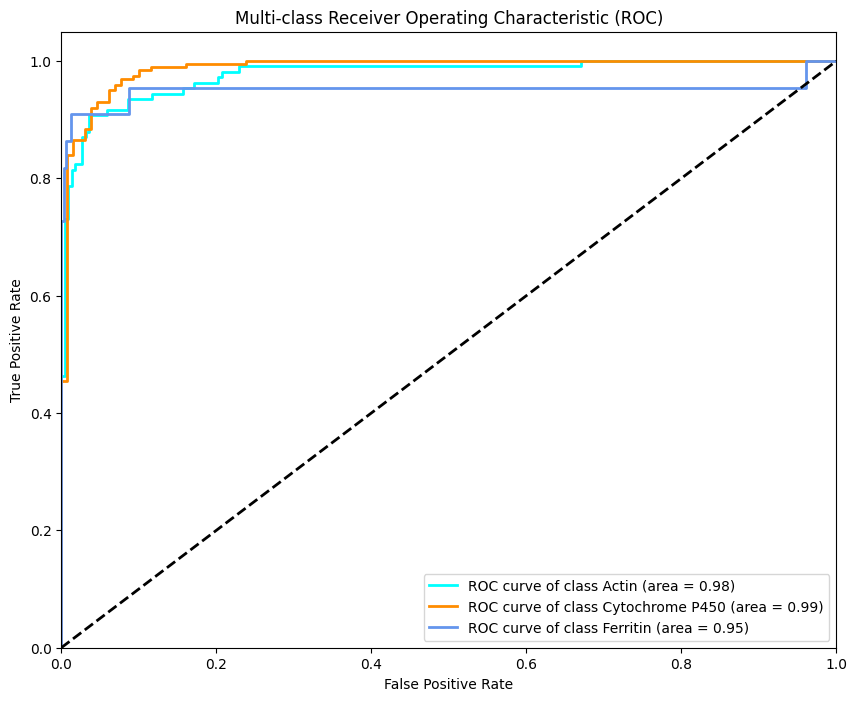


Macro-Averaged AUC Score: 0.9718
Weighted-Averaged AUC Score: 0.9816


--- Training History ---


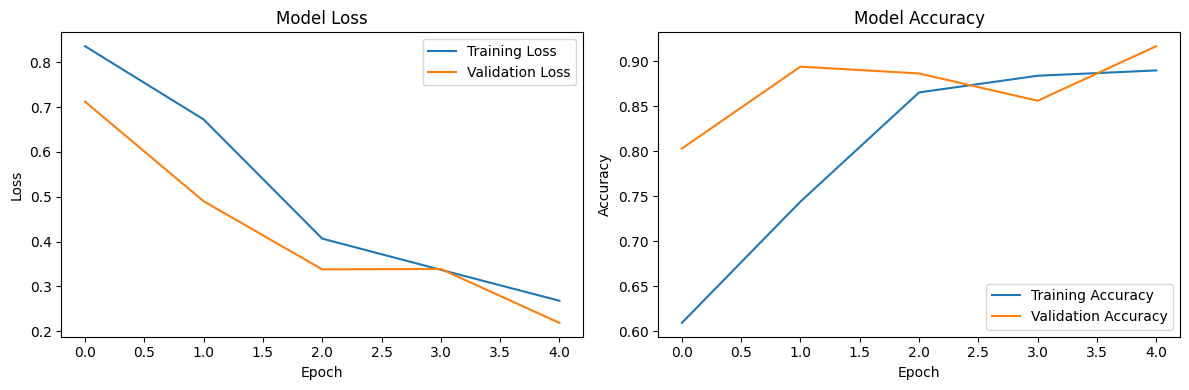


Input Sequence: 'MKKITFELVLGVNGFGSVHKRMRQRKTRTDFSEIKLLYETFYGPEPARIALGLGIEGLIT...'
Predicted Function: 'Actin' (Confidence: 71.44%)


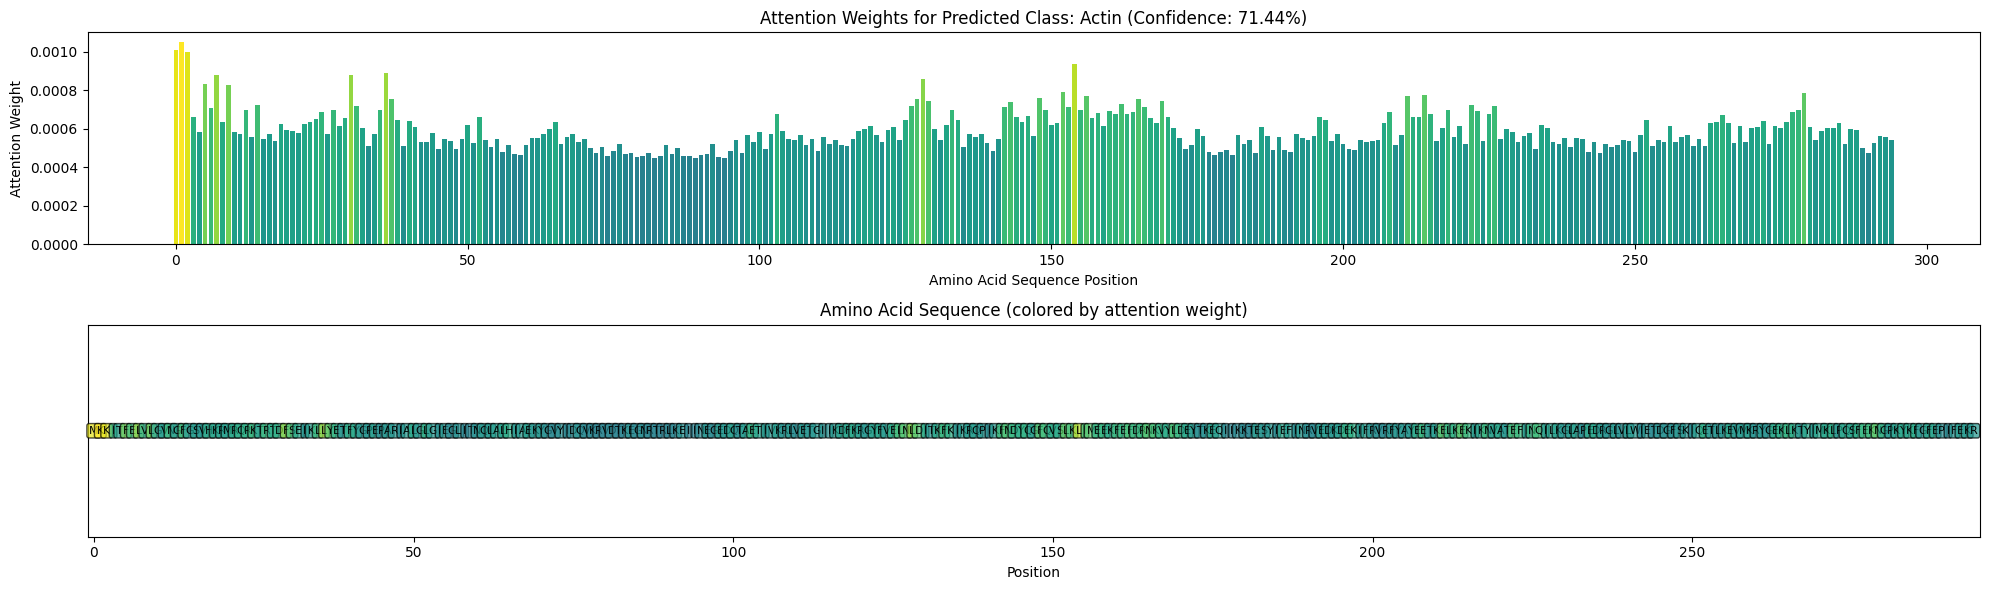

In [11]:
import requests
import pandas as pd
import numpy as np
import re
import time
import io

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Layer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    matthews_corrcoef,
    cohen_kappa_score,
    roc_curve,
    auc,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize
from itertools import cycle


print("TensorFlow Version:", tf.__version__)

# De-Novo Protein Function Prediction
# An implementation of a Bidirectional LSTM with a custom Attention layer
# to predict protein function directly from amino acid sequences.

# ###########################################################################
# # STEP 1: PROJECT SETUP AND DEPENDENCIES
# ###########################################################################
# First, we import all the necessary libraries.
# - tensorflow/keras for building the neural network.
# - numpy and pandas for data manipulation.
# - requests for programmatically fetching data from the UniProt database.
# - sklearn for splitting data and processing labels.
# - matplotlib/seaborn for visualizing the results, especially the attention weights.



# ###########################################################################
# # STEP 2: CONFIGURATION
# ###########################################################################
# This section contains all the key parameters for our project.
# These parameters have been selected to provide a strong baseline for
# performance and training efficiency.

# --- DATASET AND PREPROCESSING PARAMETERS ---
# Define the protein families you want to classify.
# Each entry is a tuple: (Family Name, UniProt Query Keyword).
PROTEIN_FAMILIES = [
    ("Actin", "family:\"actin family\""),
    ("Cytochrome P450", "family:\"cytochrome p450 family\""),
    ("Ferritin", "family:\"ferritin family\"")
]

# Maximum number of sequences to download per family to keep runtime manageable.
MAX_SEQUENCES_PER_FAMILY = 1000  # Reduced for faster execution

# The maximum length of a protein sequence. Sequences longer than this will be
# truncated, and shorter ones will be padded.
MAX_SEQ_LENGTH = 1024  # Reduced for faster training

# --- MODEL HYPERPARAMETERS ---
# The dimensionality of the embedding layer. This vector represents each amino acid.
EMBEDDING_DIM = 64  # Reduced for faster training

# The number of units in each LSTM layer (for both forward and backward passes).
LSTM_UNITS = 32  # Reduced for faster training

# Training parameters
BATCH_SIZE = 32
EPOCHS = 5  # Reduced for demonstration, increase for better performance

# ###########################################################################
# # STEP 3: DATA ACQUISITION FROM UNIPROT
# ###########################################################################
# This function programmatically fetches protein sequences from the UniProt
# database using their REST API. It constructs a query to get reviewed
# sequences (from Swiss-Prot) for a specific family.

def fetch_uniprot_sequences(query, max_sequences=None):
    """
    Fetches protein sequences from UniProt in FASTA format.
    """
    print(f"Fetching data for query: '{query}'...")
    # UniProt API endpoint for streaming FASTA files
    url = "https://rest.uniprot.org/uniprotkb/stream"

    params = {
        "query": f"({query}) AND (reviewed:true)",
        "format": "fasta",
        "compressed": "false",
    }

    try:
        response = requests.get(url, params=params, stream=True)
        response.raise_for_status() # Raise an exception for bad status codes

        sequences = []
        current_seq = ""

        # Process the streaming response line by line
        for line in response.iter_lines(decode_unicode=True):
            if line:
                if line.startswith('>'):
                    if current_seq:
                        sequences.append(current_seq)
                        if max_sequences and len(sequences) >= max_sequences:
                            break
                    current_seq = ""
                else:
                    current_seq += line.strip()

        if current_seq and (not max_sequences or len(sequences) < max_sequences):
            sequences.append(current_seq)

        print(f"Successfully fetched {len(sequences)} sequences.")
        return sequences

    except requests.exceptions.RequestException as e:
        print(f"An error occurred during API request: {e}")
        return []

# ###########################################################################
# # STEP 4: DATA PREPROCESSING
# ###########################################################################
# We need to convert the raw amino acid strings into a numerical format
# that our neural network can understand.

# 1. Define the vocabulary of amino acids.
AMINO_ACIDS = 'ACDEFGHIKLMNPQRSTVWYX' # X is for unknown/other
VOCAB_SIZE = len(AMINO_ACIDS) + 1  # +1 for padding token '0'
AA_TO_INT = {aa: i + 1 for i, aa in enumerate(AMINO_ACIDS)}
INT_TO_AA = {i + 1: aa for i, aa in enumerate(AMINO_ACIDS)}

def tokenize_sequence(seq):
    """Converts an amino acid sequence string to a list of integers."""
    return [AA_TO_INT.get(aa, 0) for aa in seq.upper()]  # Use 0 for amino acids not in our vocab

def preprocess_data(protein_families, max_seq_per_family, max_len):
    """
    Main function to fetch, process, and prepare data for model training.
    """
    all_sequences = []
    all_labels = []

    for label, query in protein_families:
        sequences = fetch_uniprot_sequences(query, max_seq_per_family)
        if sequences:
            all_sequences.extend(sequences)
            all_labels.extend([label] * len(sequences))
        time.sleep(1)

    # Filter out empty sequences
    filtered_sequences = []
    filtered_labels = []
    for seq, label in zip(all_sequences, all_labels):
        if len(seq) > 10:  # Only keep sequences longer than 10 amino acids
            filtered_sequences.append(seq)
            filtered_labels.append(label)

    print(f"Filtered sequences: {len(filtered_sequences)} (removed {len(all_sequences) - len(filtered_sequences)} short sequences)")

    # Tokenize sequences
    tokenized_seqs = [tokenize_sequence(seq) for seq in filtered_sequences]

    # Pad sequences to a uniform length
    X = pad_sequences(tokenized_seqs, maxlen=max_len, padding='post', truncating='post')

    # Encode labels
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(filtered_labels)
    y = to_categorical(integer_encoded)

    return X, y, label_encoder

# ###########################################################################
# # STEP 5: MODEL ARCHITECTURE (Bi-LSTM with ATTENTION)
# ###########################################################################
# Here we define our model. The key innovation is the custom Attention layer.
# A standard RNN summarizes the entire sequence into its final hidden state.
# An attention mechanism allows the model to look back over all the hidden
# states from the Bi-LSTM and assign "importance" weights to each one.
# This helps the model focus on the most relevant parts of the protein sequence
# (the "functional hotspots") when making a prediction.

class Attention(Layer):
    """
    Custom Keras Attention layer using modern TensorFlow operations.
    """
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            name="att_weight",
            shape=(input_shape[-1], 1),
            initializer="glorot_uniform",
            trainable=True
        )
        self.b = self.add_weight(
            name="att_bias",
            shape=(input_shape[1], 1),
            initializer="zeros",
            trainable=True
        )
        super(Attention, self).build(input_shape)

    def call(self, x, mask=None):
        # Compute attention scores
        et = tf.squeeze(tf.tanh(tf.matmul(x, self.W) + self.b), axis=-1)

        # Apply mask if provided
        if mask is not None:
            et = et * tf.cast(mask, tf.float32)
            # Set masked positions to very negative values
            et = tf.where(mask, et, -1e9 * tf.ones_like(et))

        # Compute attention weights
        at = tf.nn.softmax(et, axis=-1)
        at = tf.expand_dims(at, axis=-1)

        # Apply attention weights to input
        output = x * at
        return tf.reduce_sum(output, axis=1)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[-1])

    def compute_mask(self, inputs, mask=None):
        return None

def build_model(vocab_size, embedding_dim, max_length, num_classes, lstm_units):
    """
    Builds the Bi-LSTM with Attention model.
    """
    # Input Layer
    inputs = Input(shape=(max_length,))

    # Embedding Layer: Turns positive integers (indexes) into dense vectors of fixed size.
    # `mask_zero=True` tells the model to ignore padded '0' values in subsequent layers.
    embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                                input_length=max_length, mask_zero=True)(inputs)

    # Bidirectional LSTM Layer: Processes the sequence in both forward and backward
    # directions, capturing context from both ends. `return_sequences=True` is
    # crucial because we need the output of every timestep for the attention layer.
    bilstm = Bidirectional(LSTM(lstm_units, return_sequences=True), name='bidirectional')(embedding_layer)

    # Attention Layer: Our custom layer to weigh the importance of each timestep.
    attention_output = Attention(name='attention')(bilstm)

    # Output Layer: A dense layer with softmax activation to output a probability
    # distribution over the possible protein function classes.
    outputs = Dense(num_classes, activation='softmax')(attention_output)

    # Create and compile the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# ###########################################################################
# # STEP 6: TRAINING AND EVALUATION
# ###########################################################################
# This is the main execution block where we bring everything together.

def main():
    print("--- Starting Data Preprocessing ---")
    X, y, label_encoder = preprocess_data(
        PROTEIN_FAMILIES, MAX_SEQUENCES_PER_FAMILY, MAX_SEQ_LENGTH)

    if len(X) == 0:
        print(
            "No data was fetched. Please check your internet connection and try again.")
        return

    print(f"\nData shape: X={X.shape}, y={y.shape}")
    print("Classes:", list(label_encoder.classes_))
    class_names = list(label_encoder.classes_)
    num_classes = len(class_names)

    # Check if we have enough data for each class
    if num_classes < 2:
        print(
            "Error: Need at least 2 protein families with data for classification.")
        return

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)

    print("\n--- Building Model ---")
    model = build_model(VOCAB_SIZE, EMBEDDING_DIM,
                        MAX_SEQ_LENGTH, num_classes, LSTM_UNITS)
    model.summary()

    print("\n--- Starting Model Training ---")
    history = model.fit(X_train, y_train,
                        epochs=EPOCHS,
                        batch_size=BATCH_SIZE,
                        validation_split=0.1,
                        verbose=1)

    # ==========================================================================
    # --- DETAILED MODEL EVALUATION ON TEST SET ---
    # ==========================================================================
    print("\n\n--- DETAILED EVALUATION ON TEST SET ---")

    # Get model predictions
    y_score = model.predict(X_test)
    y_pred = np.argmax(y_score, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # 1. Confusion Matrix
    print("\n--- 1. Confusion Matrix ---")
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.title('Confusion Matrix')
    plt.show()

    # 2. Total Accuracy
    print("\n--- 2. Overall Accuracy ---")
    accuracy = np.trace(cm) / np.sum(cm)
    print(f"Total Test Accuracy: {accuracy * 100:.2f}%")

    # 3. Classification Report (Precision, Recall, F1-Score)
    print("\n--- 3. Classification Report ---")
    report = classification_report(y_true, y_pred, target_names=class_names)
    print(report)

    # 4. Matthews Correlation Coefficient (MCC)
    print("\n--- 4. Matthews Correlation Coefficient (MCC) ---")
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f"Matthews Correlation Coefficient: {mcc:.4f}")
    print("(+1 is perfect, 0 is random, -1 is inverse prediction)\n")

    # 5. Cohen's Kappa
    print("\n--- 5. Cohen's Kappa ---")
    kappa = cohen_kappa_score(y_true, y_pred)
    print(f"Cohen's Kappa: {kappa:.4f}")
    print("(1 is perfect agreement, 0 or less is no better than chance)\n")

    # 6. ROC Curve and AUC Score (One-vs-Rest)
    print("\n--- 6. ROC Curve and AUC Score (One-vs-Rest) ---")
    y_true_binarized = label_binarize(y_true, classes=range(num_classes))

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(10, 8))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

    # Calculate and print Macro and Weighted AUC
    macro_auc = roc_auc_score(y_true, y_score, multi_class='ovr', average='macro')
    weighted_auc = roc_auc_score(y_true, y_score, multi_class='ovr', average='weighted')
    print(f"\nMacro-Averaged AUC Score: {macro_auc:.4f}")
    print(f"Weighted-Averaged AUC Score: {weighted_auc:.4f}\n")


    # Plot training history
    print("\n--- Training History ---")
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model, label_encoder

# ###########################################################################
# # STEP 7: PREDICTION AND ATTENTION VISUALIZATION (THE "WOW" FACTOR)
# ###########################################################################
# This function demonstrates the model's real power: predicting the function
# of a new, unseen protein sequence and visualizing what parts of the
# sequence the model focused on.


def predict_and_visualize_attention(sequence, model, label_encoder):
    """
    Takes a raw amino acid sequence, predicts its class, and visualizes
    the attention weights.
    """
    # Preprocess the input sequence
    tokenized = tokenize_sequence(sequence)
    padded = pad_sequences([tokenized], maxlen=MAX_SEQ_LENGTH,
                           padding='post', truncating='post')

    # Get the model's prediction
    prediction = model.predict(padded, verbose=0)
    predicted_class_index = np.argmax(prediction)
    predicted_class_name = label_encoder.inverse_transform([
                                                           predicted_class_index])[0]
    confidence = prediction[0][predicted_class_index]

    print(f"\nInput Sequence: '{sequence[:60]}...'")
    print(
        f"Predicted Function: '{predicted_class_name}' (Confidence: {confidence:.2%})")

    # To visualize attention, we create intermediate models
    try:
        # Get the Bi-LSTM output
        bilstm_layer = model.get_layer('bidirectional')
        attention_layer = model.get_layer('attention')

        # Create a model that outputs the BiLSTM features
        intermediate_model = Model(
            inputs=model.input, outputs=bilstm_layer.output)
        bilstm_output = intermediate_model.predict(padded, verbose=0)

        # Get attention weights manually
        W_att, b_att = attention_layer.get_weights()

        # Compute attention scores
        et = np.tanh(np.dot(bilstm_output, W_att) + b_att).squeeze(-1)

        # Apply softmax to get attention weights
        # Numerical stability
        et_exp = np.exp(et - np.max(et, axis=-1, keepdims=True))
        attention_weights = et_exp / np.sum(et_exp, axis=-1, keepdims=True)
        attention_weights = attention_weights.flatten()

        # Plotting
        sequence_len = min(len(sequence), MAX_SEQ_LENGTH)
        weights_to_plot = attention_weights[:sequence_len]
        sequence_chars = list(sequence[:sequence_len])

        # Create a heatmap-style visualization
        plt.figure(figsize=(20, 6))

        # Top subplot: attention weights as bars
        plt.subplot(2, 1, 1)
        bars = plt.bar(range(len(weights_to_plot)), weights_to_plot,
                       color=plt.cm.viridis(weights_to_plot/max(weights_to_plot)))
        plt.title(
            f'Attention Weights for Predicted Class: {predicted_class_name} (Confidence: {confidence:.2%})')
        plt.xlabel('Amino Acid Sequence Position')
        plt.ylabel('Attention Weight')

        # Bottom subplot: sequence with color coding
        plt.subplot(2, 1, 2)
        colors = plt.cm.viridis(weights_to_plot/max(weights_to_plot))
        for i, (char, weight) in enumerate(zip(sequence_chars, weights_to_plot)):
            plt.text(i, 0, char, ha='center', va='center', fontsize=8,
                     bbox=dict(boxstyle='round,pad=0.2', facecolor=colors[i], alpha=0.7))

        plt.xlim(-1, len(sequence_chars))
        plt.ylim(-0.5, 0.5)
        plt.title('Amino Acid Sequence (colored by attention weight)')
        plt.xlabel('Position')
        plt.yticks([])

        # Add tick labels every 50 positions
        if len(sequence_chars) > 50:
            tick_positions = list(range(0, len(sequence_chars), 50))
            plt.xticks(tick_positions)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not visualize attention weights: {e}")
        print("But the prediction was successful!")


# Run the main training function
if __name__ == "__main__":
    try:
        model, label_encoder = main()

        # --- Example Prediction ---
        # This is a sequence for a CRISPR-Cas9 nuclease from a different organism,
        # likely unseen by the model during training.
        unseen_nuclease_sequence = "MKKITFELVLGVNGFGSVHKRMRQRKTRTDFSEIKLLYETFYGPEPARIALGLGIEGLITNQLALHIAEKYGVYIDQVKRVDTKEGNRTRLKEIINEGEDQTAETIVKRLVETGIIKDFKRGYFVELNLDITKFKIKRQPIKFNDYQGFQVSLKLIMEEKFEFDRNKVYLDEYTKEQIIKKTESYIEFINRVEDKDEKIFRVRFYAYEETKELKEKIKNVATEFINQILKGLAPEDRGLVLWIETDGFSKIQETLKEVMKRYGEKLKTYIMKLPQSFEKNGPKYKFGFEPIFEKR"

        if model is not None and label_encoder is not None:
            predict_and_visualize_attention(
                unseen_nuclease_sequence, model, label_encoder)

    except Exception as e:
        print(f"An error occurred: {e}")
        print("This might be due to network connectivity issues or API limitations.")
        print(
            "Try running the code again or reducing MAX_SEQUENCES_PER_FAMILY for faster execution.")



In [7]:
def fetch_uniprot_sequences(query, max_sequences=None):
    """
    Fetches protein sequences from UniProt in FASTA format.
    """
    print(f"Fetching data for query: '{query}'...")
    # UniProt API endpoint for streaming FASTA files
    url = "https://rest.uniprot.org/uniprotkb/stream"

    params = {
        "query": f"({query}) AND (reviewed:true)",
        "format": "fasta",
        "compressed": "false",
    }

    try:
        response = requests.get(url, params=params, stream=True)
        response.raise_for_status() # Raise an exception for bad status codes

        sequences = []
        current_seq = ""

        # Process the streaming response line by line
        for line in response.iter_lines(decode_unicode=True):
            if line:
                if line.startswith('>'):
                    if current_seq:
                        sequences.append(current_seq)
                        if max_sequences and len(sequences) >= max_sequences:
                            break
                    current_seq = ""
                else:
                    current_seq += line.strip()

        if current_seq and (not max_sequences or len(sequences) < max_sequences):
            sequences.append(current_seq)

        print(f"Successfully fetched {len(sequences)} sequences.")
        return sequences

    except requests.exceptions.RequestException as e:
        print(f"An error occurred during API request: {e}")
        return []

protein_families = [
    ("Nuclease", "family:\"cas9 family\""),
    ("Cytochrome P450", "family:\"cytochrome p450 family\""),
    ("Ferritin", "family:\"ferritin family\"")
]

max_seq_per_family = 500
for label, query in protein_families:
        sequences = fetch_uniprot_sequences(query, max_seq_per_family)
        if sequences:
            # all_sequences.extend(sequences)
            # all_labels.extend([label] * len(sequences))
            print(sequences)
        time.sleep(1)


Fetching data for query: 'family:"cas9 family"'...
Successfully fetched 14 sequences.
['MNFKILPIAIDLGVKNTGVFSAFYQKGTSLERLDNKNGKVYELSKDSYTLLMNNRTARRHQRRGIDRKQLVKRLFKLIWTEQLNLEWDKDTQQAISFLFNRRGFSFITDGYSPEYLNIVPEQVKAILMDIFDDYNGEDDLDSYLKLATEQESKISEIYNKLMQKILEFKLMKLCTDIKDDKVSTKTLKEITSYEFELLADYLANYSESLKTQKFSYTDKQGNLKELSYYHHDKYNIQEFLKRHATINDRILDTLLTDDLDIWNFNFEKFDFDKNEEKLQNQEDKDHIQAHLHHFVFAVNKIKSEMASGGRHRSQYFQEITNVLDENNHQEGYLKNFCENLHNKKYSNLSVKNLVNLIGNLSNLELKPLRKYFNDKIHAKADHWDEQKFTETYCHWILGEWRVGVKDQDKKDGAKYSYKDLCNELKQKVTKAGLVDFLLELDPCRTIPPYLDNNNRKPPKCQSLILNPKFLDNQYPNWQQYLQELKKLQSIQNYLDSFETDLKVLKSSKDQPYFVEYKSSNQQIASGQRDYKDLDARILQFIFDRVKASDELLLNEIYFQAKKLKQKASSELEKLESSKKLDEVIANSQLSQILKSQHTNGIFEQGTFLHLVCKYYKQRQRARDSRLYIMPEYRYDKKLHKYNNTGRFDDDNQLLTYCNHKPRQKRYQLLNDLAGVLQVSPNFLKDKIGSDDDLFISKWLVEHIRGFKKACEDSLKIQKDNRGLLNHKINIARNTKGKCEKEIFNLICKIEGSEDKKGNYKHGLAYELGVLLFGEPNEASKPEFDRKIKKFNSIYSFAQIQQIAFAERKGNANTCAVCSADNAHRMQQIKITEPVEDNKDKIILSAKAQRLPAIPTRIVDGAVKKMATILAKNIVDDNWQNIKQVLSAKHQLHIPIITESNAFEFEPALADVK

--- 1. Confusion Matrix ---


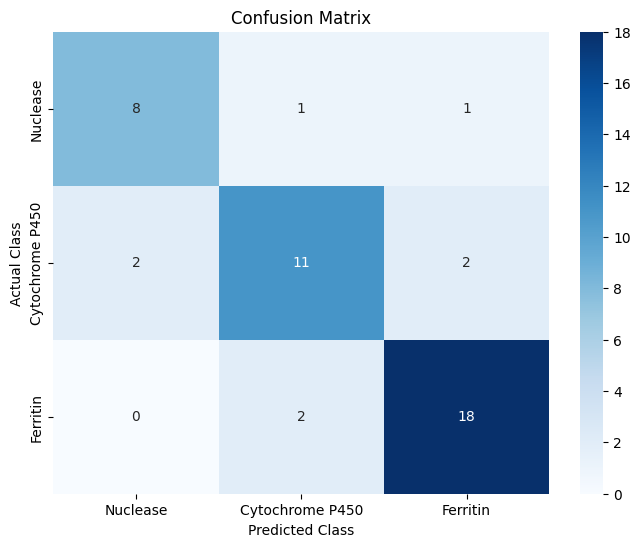



--- 2. Classification Report ---
                 precision    recall  f1-score   support

       Nuclease       0.80      0.80      0.80        10
Cytochrome P450       0.79      0.73      0.76        15
       Ferritin       0.86      0.90      0.88        20

       accuracy                           0.82        45
      macro avg       0.81      0.81      0.81        45
   weighted avg       0.82      0.82      0.82        45



--- 3. Overall Accuracy ---
Overall Accuracy: 0.8222
Note: Accuracy can be misleading on imbalanced datasets.

--- 4. Matthews Correlation Coefficient (MCC) ---
Matthews Correlation Coefficient: 0.7226
(+1 is perfect, 0 is random, -1 is inverse prediction)

--- 5. Cohen's Kappa ---
Cohen's Kappa: 0.7220
(1 is perfect agreement, 0 or less is no better than chance)

--- 6. ROC Curve and AUC Score (One-vs-Rest) ---


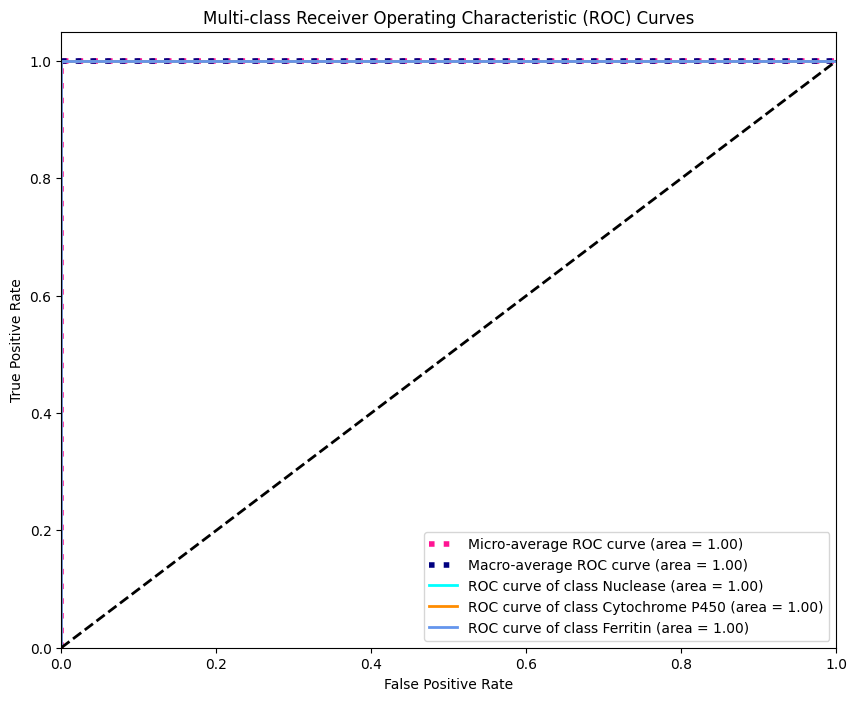


Macro-Averaged AUC Score: 1.0000
Weighted-Averaged AUC Score: 1.0000


In [ ]:
# ==============================================================================
# SETUP: Import necessary libraries and create sample data
# ==============================================================================
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    matthews_corrcoef,
    cohen_kappa_score,
    roc_curve,
    auc,
    roc_auc_score
)
from sklearn.preprocessing import label_binarize
from itertools import cycle

# --- Sample Data ---
# Imagine these are the results from your model's test set.
# y_true: The ground truth labels.
# y_pred: The labels predicted by your model.
# y_score: The probability scores for each class, from model.predict_proba().

# We will simulate a 3-class problem (e.g., Nuclease, Cytochrome, Ferritin)
# Let's make the classes imbalanced to see how metrics behave.
class_names = ['Nuclease', 'Cytochrome P450', 'Ferritin']
y_true = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,  # 10 samples of class 0
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, # 15 samples of class 1
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]) # 20 samples of class 2

# Let's simulate some model predictions with a few errors
y_pred = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 2,  # Class 0: 8 correct, 1 wrong as class 1, 1 wrong as class 2
                   1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, # Class 1: 11 correct, 2 wrong as class 0, 2 wrong as class 2
                   2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1]) # Class 2: 18 correct, 2 wrong as class 1

# Simulate probability scores for ROC/AUC calculation
# Shape is (n_samples, n_classes)
# We'll generate random scores but make them biased towards the correct class for realism
np.random.seed(42)
y_score = np.random.rand(len(y_true), len(class_names))
for i, true_label in enumerate(y_true):
    y_score[i, true_label] += 2.0 # Add a bias to the correct class
y_score /= y_score.sum(axis=1, keepdims=True) # Normalize to sum to 1

# ==============================================================================
# METRIC 1: CONFUSION MATRIX
# ==============================================================================
print("--- 1. Confusion Matrix ---")
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.show()
print("\n")

# ==============================================================================
# METRIC 2: CLASSIFICATION REPORT (Precision, Recall, F1-Score)
# ==============================================================================
print("--- 2. Classification Report ---")
# This report provides a comprehensive breakdown of performance
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)
print("\n")

# ==============================================================================
# METRIC 3: OVERALL ACCURACY
# ==============================================================================
print("--- 3. Overall Accuracy ---")
accuracy = accuracy_score(y_true, y_pred)
print(f"Overall Accuracy: {accuracy:.4f}")
print("Note: Accuracy can be misleading on imbalanced datasets.\n")

# ==============================================================================
# METRIC 4: MATTHEWS CORRELATION COEFFICIENT (MCC)
# ==============================================================================
print("--- 4. Matthews Correlation Coefficient (MCC) ---")
# MCC is a balanced measure, even for imbalanced classes
mcc = matthews_corrcoef(y_true, y_pred)
print(f"Matthews Correlation Coefficient: {mcc:.4f}")
print("(+1 is perfect, 0 is random, -1 is inverse prediction)\n")

# ==============================================================================
# METRIC 5: COHEN'S KAPPA
# ==============================================================================
print("--- 5. Cohen's Kappa ---")
# Measures agreement between predictions and actuals, corrected for chance
kappa = cohen_kappa_score(y_true, y_pred)
print(f"Cohen's Kappa: {kappa:.4f}")
print("(1 is perfect agreement, 0 or less is no better than chance)\n")

# ==============================================================================
# METRIC 6: ROC CURVE and AUC SCORE (One-vs-Rest)
# ==============================================================================
print("--- 6. ROC Curve and AUC Score (One-vs-Rest) ---")

# Binarize the labels for OvR ROC curve calculation
y_true_binarized = label_binarize(y_true, classes=range(len(class_names)))
n_classes = y_true_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})',
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label=f'Macro-average ROC curve (area = {roc_auc["macro"]:.2f})',
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add the diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# You can also get the AUC scores directly using roc_auc_score
macro_auc = roc_auc_score(y_true, y_score, multi_class='ovr', average='macro')
weighted_auc = roc_auc_score(y_true, y_score, multi_class='ovr', average='weighted')
print(f"\nMacro-Averaged AUC Score: {macro_auc:.4f}")
print(f"Weighted-Averaged AUC Score: {weighted_auc:.4f}")